# Projeto 2 - Introdução a Data Sciense
Este projeto na análise de dados demográficos e informações de 891 dos 2.224 passageiros e tripulantes a bordo do Titanic. Informações disponíveis em https://www.kaggle.com/c/titanic/data.
* Autor: Vilmar dos Santos Alves

### Dicionário dos dados:
* Survived (0 = No; 1 = Yes). 
* Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* Name - Name
* Sex - Sex
* Age - Age
* Sibsp - Number of Siblings/Spouses Aboard
* Parch - Number of Parents/Children Aboard
* Ticket - Ticket Number
* Fare - Passenger Fare
* Cabin - Cabin
* Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

### Perguntas:
1. Pessoas de qual sexo teve maior taxa de sobrevivência?

2. Como foi o comportamento de sobrevivência por classe?

3. Como foi a sobrevivência por idade?

4. Qual foi a tarifa média entre sobreviventes e mortos?

5. Como foi o comportamento de sobrevivência por quantidade de pais/filhos e por irmãos?

6. Há alguma correlação entre as variáveis disponíveis?

In [3]:
#Importe os pacotes necessários e carregue o arquivo `titanic_data_6.csv`
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
df_tt = pd.read_csv('titanic_data_6.csv')

In [4]:
#Mostrar as primeiras linhas do banco de dados para conferência
df_tt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#Calcule o número de linhas e colunas no formato (linha, colunas)
df_tt.shape

(891, 12)

### Tamanho do banco de dados:
O banco de dados contém 891 linhas e 12 colunas.

In [6]:
#Identifique os tipos de variáveis: int64 = integer; float64 = float; object = string
df_tt.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Variáveis do banco de dados:
* PassengerId   -   integer
* Survived      -   integer
* Pclass        -   integer
* Name          -   string
* Sex           -   string
* Age           -   float
* SibSp         -   integer
* Parch         -   integer
* Ticket        -   string
* Fare          -   float
* Cabin         -   string
* Embarked      -   string

## Preparando o banco de dados para análise
Utilizamos a função dt_tt.info() para identificar os valores faltantes.

In [34]:
# Identifique os valores faltantes
df_tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### Dados faltantes
Verificou-se que faltam 177 dados da variável 'Age', 687 dados de 'Cabin' e 2 dados de 'Embarked'.

Na limpeza e tratamento dos dados utilizamos três funções:
* df.drop() - para excluir as colunas 'Ticket' e 'Cabin', já que não as usaremos neste análise.
* df.fillna(df[].mean(), inplace=True) - para preencher os os campos vazios da coluna 'Age'.
* df.dropna() - para excluir as linhas que estão em branco na coluna 'Embarked'.

Vejamos a aplicação a seguir:

In [35]:
# descarte colunas do conjunto de dados (ticket e cabin) que não serão utilizados na análise
df_tt.drop(['Ticket', 'Cabin'], axis=1, inplace=True)

In [36]:
# use médias para preencher valores ausentes da idade
df_tt['Age'].fillna(df_tt['Age'].mean(), inplace=True)

# descarte as linhas que possui campos em branco 
df_tt.dropna(inplace=True)

df_tt.info()
# confirme sua correção com info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(3)
memory usage: 76.4+ KB


### Dados após a limpeza
Observa-se acima que foram excluidas as colunas 'Ticket' e 'Cabin'. 

Em seguida foi utilizada a média para preencher os dados faltantes na idade. O preenchimentos considerou a média  por meio da função df_tt.['Age'].mean.

E finalmente como foram excluídas duas linhas, que antes eram 891 e agora é 889.

In [37]:
#Mostrar as primeiras linhas do banco de dados para conferência
df_tt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


### Confirmação da limpeza de dados
Foi utilizada a função 'df.head()' para confirmar de que não houve alteração indevida dos dados. 

Como os dados apresentaram que continuam no meso padrão após a limpeza utizou-se a seguir a função 'def has_duplicate()', para verificar se há valores duplicados. E conforme aplicação abaixo 'Não há valores duplicados'.

In [38]:
#Identifique os valores duplicados
def has_duplicate(df_tt):
    if df_tt.duplicated().any():
        print('Possui {0} valores duplicados'.format(df_tt.duplicated().sum()))
    else:
        print('Não possui valores duplicados')
has_duplicate(df_tt)

Não possui valores duplicados


### Análise descritiva dos dados
A aplicação da função 'df.nunique() abaixo retornou os valores únicos para cada coluna.

In [39]:
#Calcule os valores únicos
df_tt.nunique()

PassengerId    889
Survived         2
Pclass           3
Name           889
Sex              2
Age             89
SibSp            7
Parch            7
Fare           247
Embarked         3
dtype: int64

### Análise descritiva dos dados
A atulização da função 'df_tt.describe()' retorna a análise descritiva (contagem, média, desvio padrão, percentis mínimo, 25%, 50%, 75% e máximo), conforme tabela a seguir:

In [40]:
#Faça análise descritiva das variáveis integer e float
df_tt.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Análise da sobrevivência por sexo:

Sex
female    0.740385
male      0.188908
Name: Survived, dtype: float64

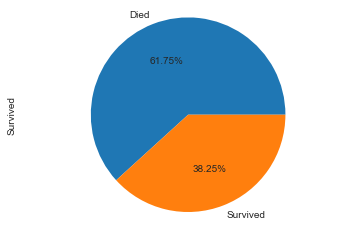

In [41]:
# Para trocar os valores numéricos pelos nomes nos gráficos
survived_map = {0: 'Died', 1: 'Survived'} #https://github.com/carlosbaia/carlosbaia.github.io/blob/master/notebook/visualizacao-e-analise-de-dados.ipynb

#Plota gráfico setorial
df_tt.Survived.map(survived_map).value_counts().plot(kind='pie', autopct='%.2f%%')
plt.axis('equal');

# Calcula mpedia de sobrevivencia agrupado por sexo
df_tt.groupby(['Sex']).mean()['Survived']



Verifica-se que dos 889 casos avaliados, 61,75% eram foram a óbito e 38,25% sobreviveram ao naufrágio.

Quando analisado somente entre os homens a sobrevivêncian foi somente de 18,89% enquanto que entre as mulheres foi de 74,04%, conforme dados acima.
******************************************************************************************************************
#### O gráfico a seguir demonstra os quantitativos e proporções por sexo.

Text(0.5,1,'Sobreviventes/Não-Sobreviventes por sexo e idade')

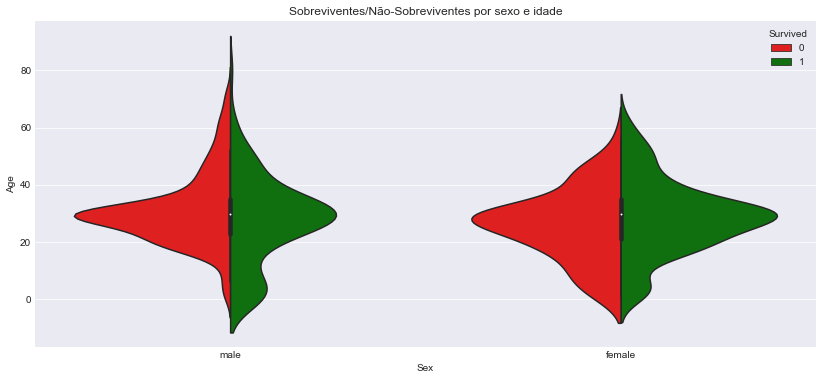

In [44]:
#Plote gráfico violino de Sexo x Idade
#https://ahmedbesbes.com/how-to-score-08134-in-titanic-kaggle-challenge.html
fig = plt.figure(figsize=(14, 6))
sns.violinplot(x='Sex', y='Age', 
               hue='Survived', data=df_tt, 
               split=True,
               palette={0: "r", 1: "g"}
              );
plt.title('Sobreviventes/Não-Sobreviventes por sexo e idade')

De acordo com o gráfico, verifica-se que a maior taxa de sobrevivência de concentrou entre as mulheres, demonstrando equíbrio entre vivos e mortos. Quanto aos homens, somente entre as crianças ouve a sobrevivência da maior. Já nas demais faixas etárias a maioria foi a óbito.
******************************************************************************************************************

#### O gráfico a seguir mostra os mortos e sobreviventes classificados por gênero e classe

Text(0.5,1,'Sobreviventes/Não-Sobreviventes por sexo e classe')

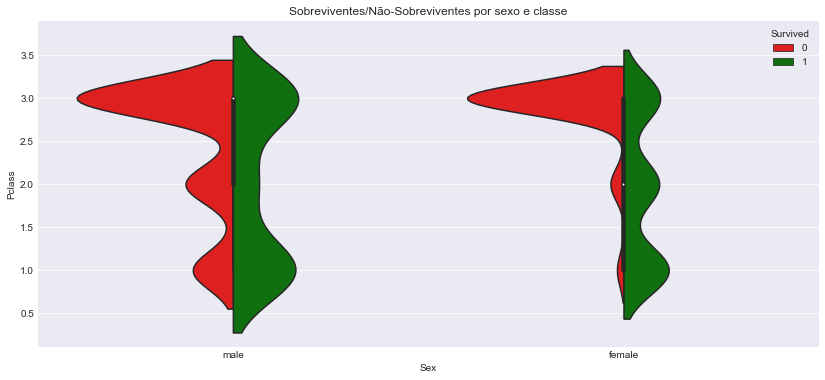

In [45]:
# Plote gráfico de sobrevivência ou não por sexo e classe.
#https://ahmedbesbes.com/how-to-score-08134-in-titanic-kaggle-challenge.html
fig = plt.figure(figsize=(14, 6))
sns.violinplot(x='Sex', y='Pclass', 
               hue='Survived', data=df_tt, 
               split=True,
               palette={0: "r", 1: "g"}
              );
plt.title('Sobreviventes/Não-Sobreviventes por sexo e classe')

O que se verifica é que a sobrevivência foi maior entre os passageiros do sexo feminino e na primeira e segunda classe, sendo muito pequena a proporção de morte na primeira classe. 

Quando feita a mesma análise entre os passgeiros do sexo masculino, somente na primeira a maioria sobrevivel, mas aidna assim, houve muitas mortes entre os homens. Já na terceira classe a proporção de mortos foi muito superior aos sobreviventes entre ambos os sexos.
******************************************************************************************************************
### Análise da sobrevivência por idade média

MÉDIA
 Survived          0          1
Sex                           
female    26.023272  28.797265
male      31.175224  27.631705

MEDIANA
 Survived          0          1
Sex                           
female    29.000000  29.699118
male      29.699118  29.699118


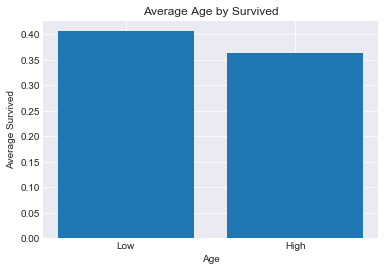

In [16]:
#Encontre a idade média de cada genêro e sobrevivência com groupby

tab_mean = pd.pivot_table(data=df_tt, values='Age', index='Sex', columns='Survived', aggfunc='mean') 

#Encontre a idade mediana de cada genêro e sobrevivência com groupby
tab_median = pd.pivot_table(data=df_tt, values='Age', index='Sex', columns='Survived', aggfunc='median')

#Use query para selecionar cada grupo e obter a sobrevivência média
median = df_tt['Age'].median()
low = df_tt.query('Age < {}'.format(median))
high = df_tt.query('Age >= {}'.format(median))

mean_survived_low = low['Survived'].mean()
mean_survived_high = high['Survived'].mean()

# Crie um gráfico de barras com rótulos adequados
locations = [1, 2]
heights = [mean_survived_low, mean_survived_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Age by Survived')
plt.xlabel('Age')
plt.ylabel('Average Survived')


#Imprime tabelas de média e mediana
print('MÉDIA\n',tab_mean)
print('\nMEDIANA\n',tab_median)

A taxa de sobrevivência entre os náufragos com idade abaixo da média (29.6) foi superior a 40%, enquanto que entre os demais foi de 37%.

Pelas tabelas de média e mediana pode-se fazer as seguintes inferências:
* A idade média das mulheres não sobreviventes é de 26,02 e das sobreviventes 28,8, e portanto as mulheres, bem como, pela mediana 29 anos no caso das não sobreviventes e 29,7 anos, entre as sobreviventes. Portanto as mulheres com mais idade tiveram mais chances de sobreviver.
* Já entre os homens, embora a median tenha sido de 29,7 tanto entre sobreviventes e não sobreviventes, pela média os nao sobrevientes tinham 31,18 em média versus 27,63 dos sobreviventes. Neste caso os mais novos sobreviveram mais. Isso talvez faça sentido pelo motivo de que os meninos tenham sido salvos juntos com suas mães.
******************************************************************************************************************
### Análise da sobrevivência considerando a tarifa e a classe

TARIFA MÉDIA - POR TIPO SOBREVIVENTES
 Survived
0    22.117887
1    48.209498
Name: Fare, dtype: float64

TARIFA MÉDIA - CLASSE X SOBREVIVENTES
 Survived          0          1
Pclass                        
1         64.684008  95.840984
2         19.412328  22.055700
3         13.669364  13.694887


Text(0.5,1,'Histograma Tarifa x Passageiros')

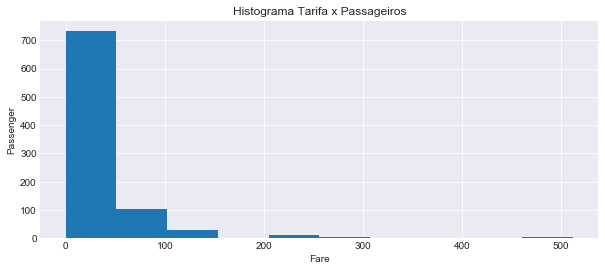

In [23]:
#Encontre o valor médio de pagamento entre sobreviventes e não-sobreviventes 
tab_fare = pd.pivot_table(data=df_tt, values='Fare', index='Pclass', columns='Survived', aggfunc='mean') 
tab_surv = df_tt.groupby(['Survived']).mean()['Fare']

#Imprime as tabelas tab_fare e tab_surv
print('TARIFA MÉDIA - POR TIPO SOBREVIVENTES\n', tab_surv)
print('\nTARIFA MÉDIA - CLASSE X SOBREVIVENTES\n',tab_fare)

# trace um gráfico com a distribuição da tarifa
df_tt["Fare"].hist(figsize=(10, 4))
plt.xlabel('Fare')
plt.ylabel('Passenger')
plt.title('Histograma Tarifa x Passageiros')



A tarifa média entre os mortos foi de 22.12, já entre os sobreviventes foi de 48.40. Ao analisar as tarifas médias por classe, infere-se que a maioria dos sobreviventes estavam na 1ª classe.

Analisando por classe, temos as seguintes tarifas médias:
* Entre os sobreviventes das 1ª classe a tarifa média foi de 95,84, contra 64,68 dos não-sobreviventes da mesma classe.
* Na 2ª classe, segue de forma análoga 22,06 e 19,41, respectivamente.
* Já terceira classe em ambos os caso é de 13,67.

Complementarmente, veririfica-se no histograma que a maior parte dos passageis pagaram tarifa de até $50, e de 50 a 100.
******************************

SOBREVIVENTES POR CLASSE
 Pclass
1    0.626168
2    0.472826
3    0.242363
Name: Survived, dtype: float64


Text(0.5,1,'Sobreviventes/Não-Sobreviventes por Classe')

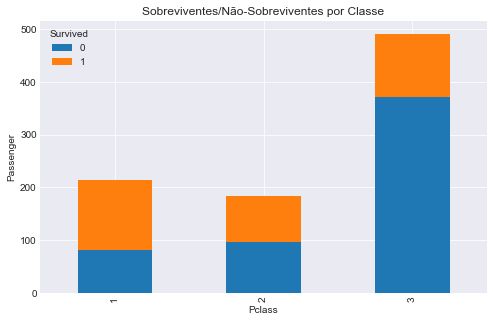

In [25]:
#Encontre a média de sobrevivência 
tab_surv1 = df_tt.groupby(['Pclass']).mean()['Survived']
print('SOBREVIVENTES POR CLASSE\n', tab_surv1)

#Plota gráfico de sobrevivência por classe
def graf_survived(x, y,label):
    df_grouped = df_tt.groupby(y)[x].count()
    df_grouped.unstack().plot(kind='bar',stacked=True, grid=True, figsize=(8,5))
    plt.ylabel(label)
    
graf_survived('Pclass',['Pclass', 'Survived'], 'Passenger');
plt.title('Sobreviventes/Não-Sobreviventes por Classe')

Observa-se que a sobrevivência por classe é de 62,96% entre a primeira classe, 47,28% na segunda e somente 24,23% na terceira. No entanto, dos 889 passageiros, aproximadamente 500 estavam na 3ª classe, o que explica o percentual elevado de óbito.
*******************************************************
### Análise por cidade de embarque

In [19]:
#Adaptado de http://minerandodados.com.br/index.php/2017/04/27/exploratory-data-analysis-eda/
tab_city1 = df_tt.groupby(['Embarked']).mean()['Survived']
tab_city2 = pd.pivot_table(data=df_tt, values='PassengerId', index='Embarked', 
                           columns='Survived', aggfunc='count') 

print('PASSAGEIROS POR CIDADE DE EMBARQUE\n',tab_city1)
print('\nPASSAGEIROS POR CIDADE DE EMBARQUE - SOBREVIVENTES\n',tab_city2)

PASSAGEIROS POR CIDADE DE EMBARQUE
 Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

PASSAGEIROS POR CIDADE DE EMBARQUE - SOBREVIVENTES
 Survived    0    1
Embarked          
C          75   93
Q          47   30
S         427  217


O Titanic parou em três cidades para embarque. A maior parte do passgeiros embarcaram na cidade de Southampton e em Queenstown tevem a minoria dos enmbarques. Quanto a taxa de sobrevivência os de Cherbourg foi de 0.553571, de Queenstown 0.389610 e 0.336957 em Southampton. 
**************************************
### Análise de sobrevivência por quantidade filhos

Text(0.5,1,'Sobreviventes/Não-Sobreviventes por Nº de Pais/Filhos')

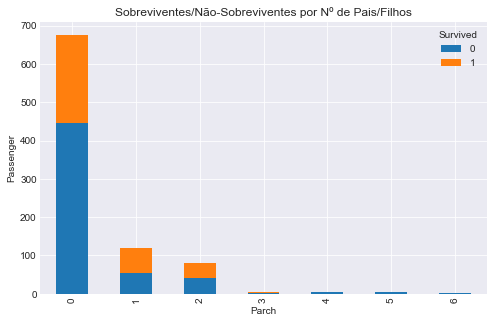

In [27]:
#Plote gráfico de sobrevivência por quantidade de pais/filho
graf_survived('Parch',['Parch', 'Survived'], 'Passenger');
plt.title('Sobreviventes/Não-Sobreviventes por Nº de Pais/Filhos')

O gráfico abaixo mostra a sobrevivência das pessoas em relação a quantidade de pais/filhos. Verifica-se que a sobrevivência foi proporcionamente maior entre os que tinha 1 ou dois. Analisando o contexto, isso pode estar relacionado a prioridade de mãe com filhos. 
************************************
### Análise de sobrevivência por quantidade de irmãos

Text(0.5,1,'Sobreviventes/Não-Sobreviventes por Nº de Irmãos')

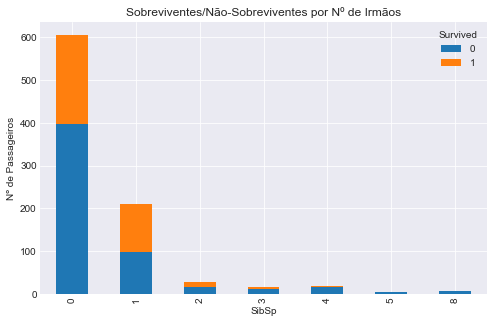

In [28]:
#Plote gráfico de sobrevivência por quantidade de irmãos
graf_survived('SibSp',['SibSp', 'Survived'], 'Nº de Passageiros');
plt.title('Sobreviventes/Não-Sobreviventes por Nº de Irmãos')

De forma análoga aos pais/filhos, comportamento pode ser também observado no gráfico acima, onde mostra por quantida de irmãos. Observa-se que quem tinha um irmão(a) teve mais chance de sobreviver.

*************************************************************
## Análise pela Correlação de Pearson

In [29]:
#Matriz de correlação
r = df_tt.corr()
r2 = r**2
print('Matriz de Correlação de Pearson\n',round(r, 2))

print('\nMatriz de R^2\n',round(r2, 2))


Matriz de Correlação de Pearson
              PassengerId  Survived  Pclass   Age  SibSp  Parch  Fare
PassengerId         1.00     -0.01   -0.04  0.03  -0.06  -0.00  0.01
Survived           -0.01      1.00   -0.34 -0.07  -0.03   0.08  0.26
Pclass             -0.04     -0.34    1.00 -0.33   0.08   0.02 -0.55
Age                 0.03     -0.07   -0.33  1.00  -0.23  -0.18  0.09
SibSp              -0.06     -0.03    0.08 -0.23   1.00   0.41  0.16
Parch              -0.00      0.08    0.02 -0.18   0.41   1.00  0.22
Fare                0.01      0.26   -0.55  0.09   0.16   0.22  1.00

Matriz de R^2
              PassengerId  Survived  Pclass   Age  SibSp  Parch  Fare
PassengerId          1.0      0.00    0.00  0.00   0.00   0.00  0.00
Survived             0.0      1.00    0.11  0.01   0.00   0.01  0.07
Pclass               0.0      0.11    1.00  0.11   0.01   0.00  0.30
Age                  0.0      0.01    0.11  1.00   0.05   0.03  0.01
SibSp                0.0      0.00    0.01  0.05   1.0

Conforme mostra a maytoz de correlação de Pearson, verifica-se que as variáveis Survived e Pclass tem uma correlação de 0,34 e Fare e Survived 0,26 (Matriz de R^2). Embora também fracas são as únicas correlações relacionadas a sobrevivência. Adicionamente estas conseguem conseguem explicar a sobrevência apenas em 11% e 7% respectivamente.

As variáveis Pclass e Fare tem a correlação de 0,55 e explicaação de 30% entre si, porém tais informações tem pouca explicação.
******************************************

## Principais conclusões

### 1. Pessoas de qual sexo teve maior taxa de sobrevivência?
Observou-se que houve maior taxa de sobrevivência entre o sexo feminino.

### 2. Como foi o comportamento de sobrevivência por classe?
Houve maior taxa de sobrevivência na primeira classe e a pior na terceira classe. 
Adionalmente, observou-se que quando separado por sexo, as mulheres teve boa taxa de sobrevivência tanto na 1ª quanto na 2ª classe. Já entre os homens até mesmo na 1ª classe a sobrevivência foi menor que as mortes.

### 3. Como foi a sobrevivência por idade?
Quanto a sobrevivência por idade obervou-se que a idade mediana do passageiros era de 29.7 anos e taxa de sobrevivência foi maior entre os mais novos.

### 4. Qual foi a tarifa média entre sobreviventes e mortos?
A tarifa média entre os mortos foi de 22.12 e entre os sobreviventes foi de 48.40.

### 5. Como foi o comportamento de sobrevivência por quantidade de pais/filhos e por irmãos?
A taxa de sobrevivência foi maior nos casos em que o passageiro tinha 1 ou 2 familiares a brdo, tanto na comparação pai/filho, como irmãos.

### 6. Há alguma correlação entre as variáveis disponíveis?
Quanto as correlações, verificou-se coorrelação moderada entre o valor da tarifa e a classe ocupada e fraca entre Survived x Pclasse e Survived x Fare, mas o poder de explicação é de 11% e 7%, respectivamente.
****************************************************************************************************

## Limitações desta análise
1. Consiste em estudo descritivo, sem quaisquer testes inferenciais, e portanto, não pode ser inferido como válido para outros casos.

2. O estudo das idade não são totalmente precisos por haviam 177 campos em branco que foram preenchidos com a média.

3. Mesmo se aplicado os testes inferenciais posteriormente, as variáveis disponíveis são limitadas para preditividade de outros casos pelos seguintes motivos:

Não tem disponível as variáveis que caracterizam o navio;

Falta informação de clima, ventos e outras condições ambientais;

A tecnologia atual pode ser muito diferente da época no sentido de segurança a vida.

**********************************************************************************************************

## Referências
http://rstudio-pubs-static.s3.amazonaws.com/24969_894d890964fd4308ab537bfde1f784d2.html

http://minerandodados.com.br/index.php/2017/04/27/exploratory-data-analysis-eda/

http://carlosbaia.com/2017/08/17/visualizacao-e-analise-de-dados/

https://ahmedbesbes.com/how-to-score-08134-in-titanic-kaggle-challenge.html